<a href="https://www.kaggle.com/code/saswattulo/linear-regression-from-scratch?scriptVersionId=220013272" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/chasinginfinity/ml-from-scratch/refs/heads/master/02%20Linear%20Regression%20using%20Gradient%20Descent/data.csv")
df.head()

,32.502345269453031,31.70700584656992
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518


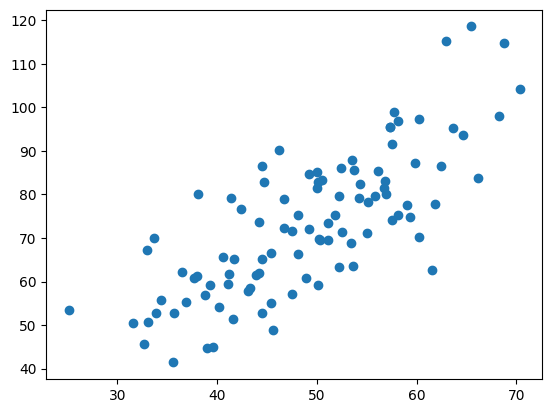

In [2]:
X = df[df.columns[0]]
y=df[df.columns[1]]

plt.scatter(X,y)

In [3]:
epochs = 10000
m = 0
c = 0

n= float(len(X))
L= 0.0001

for _ in range(epochs):
    Y_pred = m*X + c
    dm = (-2/n)*sum(X*(y-Y_pred))
    dc = (-2/n)*sum(y - Y_pred)

    m = m - L*dm
    c = c - L*dc
print(m,c)

1.4673253395092016 0.7300121018992646


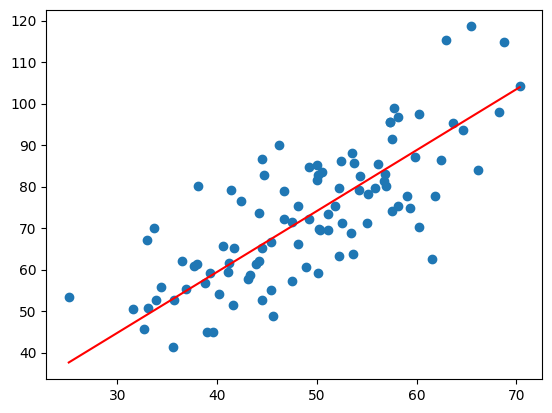

In [4]:
Y_pred = m*X + c
plt.scatter(X,y)
plt.plot([min(X),max(X)],[min(Y_pred),max(Y_pred)],color='red')
plt.show()

In [5]:
import numpy as np

class GradientDescent:
    def __init__(self,epochs=1000,learning_rate=0.001):
        self.weights = None
        self.intercept = None
        self.epochs = epochs
        self.learning_rate = learning_rate

    def _gradient_descent(self,sample_size,X,y_pred,y_true):
        self.dw = (-1/sample_size)*np.dot(X.transpose(),(y_true-y_pred))
        self.dc = (-1/sample_size)*np.sum(y_true-y_pred)

        self.weights = self.weights - self.learning_rate*self.dw
        self.intercept = self.intercept - self.learning_rate*self.dc

    def fit(self,X,y):
        n_samples,n_features = X.shape
        self.weights = np.zeros(n_features)
        self.intercept = 0

        for _ in range(self.epochs):
            y_pred = self.intercept + X.dot(self.weights)

            self._gradient_descent(sample_size=n_samples,X=X,y_pred=y_pred,y_true=y)

    def predict(self,x):
        if type(x)!= 'numpy.ndarray':
            x = np.array(x)
        return self.intercept+x.dot(self.weights)

In [6]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples = 200,n_features = 5,n_targets = 1, noise = 10, random_state = 42)
X[:5,:]

array([[-0.3853136 ,  0.1990597 , -0.60021688,  0.46210347,  0.06980208],
       [ 0.13074058,  1.6324113 , -1.43014138, -1.24778318, -0.44004449],
       [-0.77300978,  0.22409248,  0.0125924 , -0.40122047,  0.0976761 ],
       [-0.57677133, -0.05023811, -0.23894805,  0.27045683, -0.90756366],
       [-0.57581824,  0.6141667 ,  0.75750771, -0.2209696 , -0.53050115]])

In [7]:
model = GradientDescent(epochs = 1000, learning_rate=0.01)
model.fit(X,y)
print(f"Model weights are {model.weights} and {model.intercept}")

Model weights are [ 3.32814434 10.66088938 64.12658539 17.72241903 70.28928242] and 0.6163147879552808


In [8]:
class GradientDescnetV2:
    def __init__(self,lr=0.001,epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
        

    def _gradient_descent(self,sample_size,X,y_true,y_pred):
        self.dw = (-1/sample_size)*np.dot(X.transpose(),(y_true-y_pred))
        self.dc = (-1/sample_size)*np.sum(y_true-y_pred)
        self.weights = self.weights - self.lr*self.dw
        self.bias = self.bias - self.lr*self.dc
        

    def fit(self,X,y):
        sample_size,features = X.shape
        self.weights = np.zeros(features)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = self.bias + X.dot(self.weights)
            self._gradient_descent(sample_size=sample_size,X=X,y_true=y,y_pred = y_pred)
            
    def predict(self,X):
        return self.bias+X.dot(self.weights)
        

In [9]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples = 200,n_features = 5,n_targets = 1, noise = 10, random_state = 42)
X[:5,:]
model = GradientDescnetV2(epochs = 1000, lr=0.01)
model.fit(X,y)
print(f"Model weights are {model.weights} and {model.bias}")

Model weights are [ 3.32814434 10.66088938 64.12658539 17.72241903 70.28928242] and 0.6163147879552808
